# PHYS 404, Homework 8, 3/12/2023
Solve the diffusion equation u_t=D u_{xx} with D=1 in the interval x=[0,1] from t=0 to t=0.1. 

The initial condition is u(x,0)=0.5*(cos(13x)+1), the boundary condition is u(0,t)=1 and u(1,t)=0.

After solving the equation, please also change tend to a large value to see how the solution behave in the long run.
### Retrieve FTCS

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


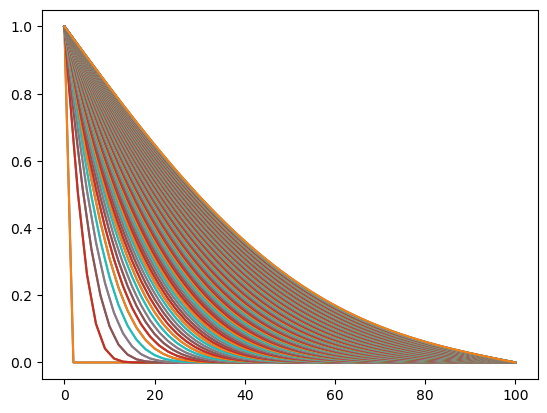

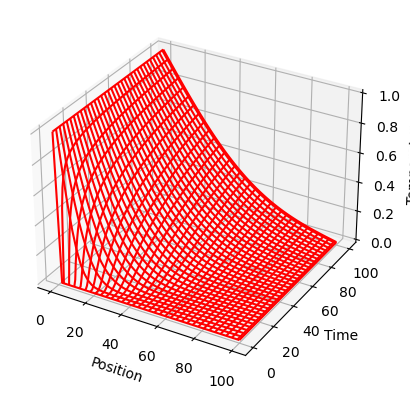

Done


In [6]:
# EqHeat.py: solves heat equation via finite differences, 3-D plot
from numpy import *
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 

Nx = 101;       tend=10000.; Dt=5.2;  Dtout=100.; Nt = 3000;     Dx = 0.03;                                                            
KAPPA = 210.; SPH = 900.; RHO = 2700. # Conductivity, specf heat, density                                                      
T = zeros((Nx,2),float);  Tp = zeros((Nx,int(tend/Dtout)+1),float)  
# T[i,0] is the temperature at position i and old time, T[i, 1] is at the new time                                    

for ix in range (1, Nx - 1):  0.5*(cos(13*ix*Dx) + 1);               # Initial T
T[0,0] = 1.0 ;   T[0,1] = 1.0                           # 1st & last T = 0
T[Nx-1,0] = 0. ; T[Nx-1,1] = 0.
cons = KAPPA/(SPH*RHO)*Dt/(Dx*Dx);                             # constant=D*dt/Dx^2
m = 1                                                           # counter

toutn=0
t=0.
while t < tend:                                  
    for ix in range (1, Nx - 1):
        # please finish this line using T[ix-1, 0],T[ix, 0],T[ix+1, 0] where T[ix, 0] means T at ix at the old step, T[ix, 1] means the new step        
        T[ix, 1] = T[ix, 0] + cons*(T[ix+1, 0] - 2* T[ix, 0] + T[ix-1,0])                                                 
    t+=Dt
    for ix in range (1, Nx - 1):  T[ix, 0] = T[ix, 1] 

    if t >= toutn*Dtout: 
        p.plot(T)
        Tp[:,toutn] = T[:,1]   
        print(toutn)   
        toutn += 1                        
            
x = list(range(0, Nx))                       # Plot alternate pts
y = list(range(0, int(tend/Dtout)+1))                      
X, Y = p.meshgrid(x, y)                       

def functz(Tpl):                            
    z = Tpl[X, Y]       
    return z

Z = functz(Tp) 
# Create figure
fig = p.figure()
ax = fig.add_subplot(projection='3d')                                                                                  
ax.plot_wireframe(X, Y, Z, color = 'r')                    
ax.set_xlabel('Position')                                     
ax.set_ylabel('Time')
ax.set_zlabel('Temperature')
p.show()                               
print("Done")                               